### Titanic 생존자 데이터셋 분석

In [1]:
import pandas as pd
import numpy as np

import seaborn as sb

titanic = sb.load_dataset('titanic')
print(type(titanic))  # DataFrame
# titanic.describe()
titanic

<class 'pandas.core.frame.DataFrame'>


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [2]:
# 성별 평균 생존율
titanic.pivot_table('survived','sex',aggfunc='mean')

# titanic.pivot_table(values='survived',index='sex',aggfunc='mean')

# DataFrame.pivot_table(
#     values=None,
#     index=None,
#     columns=None,
#     aggfunc='mean',
#     fill_value=None,
#     margins=False,
#     dropna=True,
#     margins_name='All',
#     observed=False,
# ) 

,survived
sex,
female,0.742038
male,0.188908


In [3]:
# 'pclass' 별 평균 생존율
titanic.pivot_table('survived','pclass',aggfunc='mean')

,survived
pclass,
1,0.629630
2,0.472826
3,0.242363


In [4]:
# 'embark_town' 별 평균 생존율
titanic.pivot_table('survived','embark_town',aggfunc='mean')

,survived
embark_town,
Cherbourg,0.553571
Queenstown,0.389610
Southampton,0.336957


In [5]:
# 'class','sibsp' 를 MultiIndex로 group화 하고 컬럼을 'sex'로 하는 생존율(평균)
titanic.pivot_table('survived',index=['class','sibsp'],columns='sex',
                   aggfunc='mean')

sex             female      male
class  sibsp                    
First  0      0.979592  0.329545
       1      0.950000  0.483871
       2      1.000000  0.500000
       3      1.000000  0.000000
Second 0      0.931818  0.118421
       1      0.892857  0.259259
       2      1.000000  0.200000
       3      1.000000       NaN
Third  0      0.592593  0.129630
       1      0.447368  0.222222
       2      0.571429  0.125000
       3      0.125000  0.000000
       4      0.333333  0.083333
       5      0.000000  0.000000
       8      0.000000  0.000000

In [6]:
# 'age'로 등급별 생존율 구하기
titanic['age'].min()  # 0.42
titanic['age'].max()  # 80.0
titanic['age'].mean() # 29.69

# titanic.pivot_table('survived','age',aggfunc='mean')

# 'age'를 5단계로 출력
pd.qcut(titanic.age,5) # titanic.age 는 titanic['age']와 동일

# '(': parentheses is exclusive. 불포함, 초과, '>'
# '[': square bracket is inclusive; 포함, 이하, '<='
# [(0.419, 19.0] < (19.0, 25.0] < (25.0, 31.8] < (31.8, 41.0] < (41.0, 80.0]]
#   'child'         'young'         'middle'       'old'          'very old'

0       (19.0, 25.0]
1       (31.8, 41.0]
2       (25.0, 31.8]
3       (31.8, 41.0]
4       (31.8, 41.0]
           ...      
886     (25.0, 31.8]
887    (0.419, 19.0]
888              NaN
889     (25.0, 31.8]
890     (31.8, 41.0]
Name: age, Length: 891, dtype: category
Categories (5, interval[float64, right]): [(0.419, 19.0] < (19.0, 25.0] < (25.0, 31.8] < (31.8, 41.0] < (41.0, 80.0]]

In [7]:
titanic['age_class'] = pd.qcut(titanic.age,5,
                       labels=['child','young','middle','old','very old'])
titanic['age2'] = titanic['age']
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_class,age2
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,old,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,middle,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,old,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,old,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,middle,27.0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,child,19.0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,NaN,NaN
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,middle,26.0


In [8]:
# 'age_class', 5단계 연령 등급별 생존율
titanic.pivot_table('survived','age_class',aggfunc='mean')

,survived
age_class,
child,0.481707
young,0.328467
middle,0.393701
old,0.437500
very old,0.373239


In [9]:
# 'sex','age_class' 를 MultiIndex로 한 평균 생존율
titanic.pivot_table('survived',index=['sex','age_class'],aggfunc='mean')

survived
sex    age_class          
female child      0.706667
       young      0.723404
       middle     0.727273
       old        0.843137
       very old   0.795455
male   child      0.292135
       young      0.122222
       middle     0.216867
       old        0.215054
       very old   0.183673

In [10]:
# 분포의 갯수
titanic['age_class'].value_counts()

age_class
child       164
old         144
very old    142
young       137
middle      127
Name: count, dtype: int64

In [11]:
# Series 객체의 quantile()함수: 데이터의 백분위수
titanic['age'].quantile([.0,.2,.4,.6,.8,1.0])

# [(0.419, 19.0] < (19.0, 25.0] < (25.0, 31.8] < (31.8, 41.0] < (41.0, 80.0]]
#   'child'         'young'         'middle'       'old'          'very old'

0.0     0.42
0.2    19.00
0.4    25.00
0.6    31.80
0.8    41.00
1.0    80.00
Name: age, dtype: float64

28.0

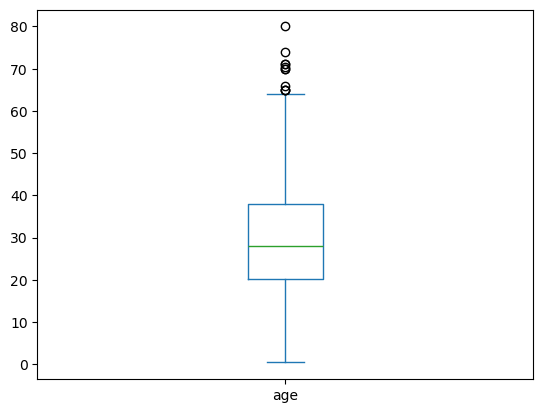

In [12]:
# 사분위수 시각화 : box plot (상자그림)
titanic['age'].plot.box()
titanic['age'].median()

In [13]:
# qcut()을 사용하여 fare 를 3단계로 분류된 'fare_class'컬럼을 추가
# label : 'First' ,'Second', 'Third'
# 'class'를 복사하여 새로운 컬럼 'class2'로 추가하고 결과를 비교
# 'fare_class' , 3단계 요금 등급별 생존율을 구하기
titanic['fare_class'] = pd.qcut(titanic.fare,3,
                         labels=['Third','Second','First'])
titanic['class2'] = titanic['class']
titanic
# pd.qcut(titanic.fare,3)
# [(-0.001, 8.662] < (8.662, 26.0] < (26.0, 512.329]]
#       'Third'         'Second'         'First'

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_class,age2,fare_class,class2
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young,22.0,Third,Third
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,old,38.0,First,First
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,middle,26.0,Third,Third
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,old,35.0,First,First
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,old,35.0,Third,Third
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,middle,27.0,Second,Second
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,child,19.0,First,First
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,NaN,NaN,Second,Third
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,middle,26.0,First,First


In [14]:
# 'fare_class', 3단계 요금 등급별 생존율
titanic.pivot_table('survived','fare_class',aggfunc='mean')

,survived
fare_class,
Third,0.198052
Second,0.402778
First,0.559322


In [15]:
# 분포의 갯수
titanic['fare_class'].value_counts()

fare_class
Third     308
First     295
Second    288
Name: count, dtype: int64

In [16]:
# 생존한 사람중에서 'fare_class'가 'third'인 사람이 몇명인지 구하기  : 61명
sv_df = titanic[titanic['survived'] == 1]
sv_df['fare_class'].value_counts()

fare_class
First     165
Second    116
Third      61
Name: count, dtype: int64

In [17]:
# 컬럼을 중간에 삽입하는 방법 : DataFrame.insert(컬럼번호,컬럼이름,추가될 컬럼데이터)
df = titanic.copy()
df.insert(4,'age_class_insert',df['age_class'])
df

,survived,pclass,sex,age,age_class_insert,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_class,age2,fare_class,class2
0,0,3,male,22.0,young,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young,22.0,Third,Third
1,1,1,female,38.0,old,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,old,38.0,First,First
2,1,3,female,26.0,middle,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,middle,26.0,Third,Third
3,1,1,female,35.0,old,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,old,35.0,First,First
4,0,3,male,35.0,old,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,old,35.0,Third,Third
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,middle,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,middle,27.0,Second,Second
887,1,1,female,19.0,child,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,child,19.0,First,First
888,0,3,female,NaN,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,NaN,NaN,Second,Third
889,1,1,male,26.0,middle,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,middle,26.0,First,First


In [18]:
# 상관 관계(Correlation): 피쳐(X값,독립변수),Y값(종속변수,레이블,답)들과의 영향을 주는 정도
titanic.corr(numeric_only=True) # 상관 계수 : (-1 ~ 1) , 0 이 가장 작은값, 0.5이상이면 상관관계가 크다  

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,age2
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367,-0.077221
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207,-0.369226
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270,1.000000
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471,-0.308247
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398,-0.189119
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832,0.096067
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744,0.280328
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000,0.198270
age2,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270,1.000000


### 날짜 다루기 : pd.to_datetime(['2023-01-10'])

In [19]:
# POSIX 시간 표기법 : 1970년 1월 1일(1677~2262)
pd.date_range('9/22/1677',periods=4,freq='D')  # OK!!, 1677-09-21 00:00:00

# pd.date_range('9/21/1677',periods=4,freq='D')  # OutOfBoundsDatetime ,Error!!

DatetimeIndex(['1677-09-22', '1677-09-23', '1677-09-24', '1677-09-25'], dtype='datetime64[ns]', freq='D')

In [20]:
date1 = '2022-12-08'   # '-', '/', ' ', '.' , ',' , ':'
date2 = '2022/12/08'
type(date1)
d1 = pd.to_datetime([date1])
d2 = pd.to_datetime([date2])
# date2 - date1 # TypeError
print(d1)      # DatetimeIndex
print(d2 - d1) # TimedeltaIndex 객체, 날짜(day) 단위로 연산이 가능

DatetimeIndex(['2022-12-08'], dtype='datetime64[ns]', freq=None)
TimedeltaIndex(['0 days'], dtype='timedelta64[ns]', freq=None)


### 엑셀 파일 읽고 쓰기
* pd.read_excel()
* df.to_excel()

In [21]:
# 읽기
df = pd.read_excel('excel_exam.xlsx',index_col='id')
type(df)  # DataFrame

df2 = df.drop(['class'],axis=1) # 열을 삭제
df2

df['total'] = df2.sum(axis=1)  # 열방향, 각 행의 합을 구함
df['mean'] = round(df2.mean(axis=1),2) # 소숫점 두자리로 반올림
df

# 쓰기
df.to_excel('new_exam.xlsx',index=True)

In [22]:
# 데이터 프레임 정렬, 새로운 컬럼 추가
df = pd.read_excel('excel_exam.xlsx',index_col='id')
df['총점'] = df['math'] + df['english'] + df['science']
df['평균'] = round((df['math'] + df['english'] + df['science'])/3,2)

# 평균이 75점 보다 큰 행을 추출
df_75 = df[df['평균'] > 75]
df_75       # 4개 행 추출

df = df.sort_values(by='평균',ascending=True)  # 오름차순
df = df.sort_values(by='평균',ascending=False) # 내림차순

# 'Pass' or 'Fail' 로 분류하기
df['합격'] = '0'
df2 = df[df['평균'] >= 75]  # 합격자
df3 = df[df['평균'] < 75]   # 불합격자
# df2['합격'] = 'Pass'      # SettingWithCopyWarning 
df2.loc[:,'합격'] = 'Pass'

# df3['합격'] = 'Fail'      # SettingWithCopyWarning 
df3.loc[:,'합격'] = 'Fail'
result = pd.concat([df2,df3])
result

,class,math,english,science,총점,평균,합격
id,,,,,,,
18,5,80,78,90,248,82.67,Pass
19,5,89,68,87,244,81.33,Pass
6,2,50,89,98,237,79.00,Pass
17,5,65,68,98,231,77.00,Pass
16,4,58,98,65,221,73.67,Fail
20,5,78,83,58,219,73.00,Fail
2,1,60,97,60,217,72.33,Fail
7,2,80,90,45,215,71.67,Fail
15,4,75,56,78,209,69.67,Fail


In [23]:
# chained assignment : copy본이 만들어 지면서 동시에 인덱싱으로 쓰기 시도시 발생
# SettingWithCopyWarning: get() --> set()
df = pd.DataFrame({'a': [1,2,3],
                   'b': ['one','two','three']})
print(df)

# SettingWithCopyWarning 메세지 출력 옵션 설정
pd.set_option('mode.chained_assignment','warn')  # SettingWithCopyWarning
# pd.set_option('mode.chained_assignment','raise') # SettingWithCopyError,오류처리
# pd.set_option('mode.chained_assignment',None)    # 경고 메세지 출력을 끔

# df['a'][0] = 40    # SettingWithCopyWarning, get()-->set(),사본 생성, 요소변경(원본 or 사본)
df.loc[0,'a'] = 50   # set() , 사본이 생성되지 않는다, 원본이 변경
df

   a      b
0  1    one
1  2    two
2  3  three


,a,b
0,50,one
1,2,two
2,3,three


In [24]:
df1 = df            # 원본과 메모리 공유
df2 = df.copy()     # copy본, 원본과 별도의 메모리 사용
df3 = df['a']       # copy본, 원본과 별도의 메모리 사용
df4 = df.loc[:,'a'] # copy본, 원본과 별도의 메모리 사용
np.shares_memory(df,df4) # False

False